# Análise exploratória de dados Pub Med e Tweet Covid19

## Instalação dos pacotes necessários para EDA

In [ ]:
# Executar esse bloco caso não tenha o pacote instalado
# install.packages("tidyverse")
# install.packages("magrittr")
# install.packages("tm")
# install.packages("wordcloud")

## Carregando os pacotes

In [1]:
library(wordcloud)
library(magrittr)
library(tm)
library(tidyverse)
library(tidyr)
library(cluster)
library(tidytext)

Loading required package: RColorBrewer

Loading required package: NLP

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::annotate() masks NLP::annotate()
✖ tidyr::extract()    masks magrittr::extract()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::set_names()  masks magrittr::set_names()



## Leitura dos dados Pub Med

In [2]:
# Leitura do arquivo por linha
covid <- readLines("PM-COVID-4064-TM.txt")

In [3]:
# Leitura do arquivo por DF
covid_df <- read.delim("PM-COVID-4064-TM.txt", header = FALSE, sep = "\n")
covid_df$doc_id <- seq.int(nrow(covid_df))
covid_df <- covid_df[,c(2,1)]
colnames(covid_df) <- c("doc_id", "text")

In [4]:
covid_source <- VectorSource(covid)
coviddf_source <- DataframeSource(covid_df)

In [5]:
covid_corpus <- VCorpus(covid_source)
coviddf_corpus <- VCorpus(coviddf_source)

In [6]:
print(covid_corpus)
print(coviddf_corpus)
covid_corpus[[1]]
covid_corpus[[1]]$content

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3767
<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2647


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1648

[1] "The World Health Organization (WHO) has issued a warning that, although the 2019  novel coronavirus (COVID-19) from Wuhan City (China), is not pandemic, it should be  contained to prevent the global spread. The COVID-19 virus was known earlier as  2019-nCoV. As of 12 February 2020, WHO reported 45,171 cases and 1115 deaths related  to COVID-19. COVID-19 is similar to Severe Acute Respiratory Syndrome coronavirus  (SARS-CoV) virus in its pathogenicity, clinical spectrum, and epidemiology.  Comparison of the genome sequences of COVID-19, SARS-CoV, and Middle East  Respiratory Syndrome coronavirus (MERS-CoV) showed that COVID-19 has a better  sequence identity with SARS-CoV compared to MERS CoV. However, the amino acid  sequence of COVID-19 differs from other coronaviruses specifically in the regions of  1ab polyprotein and surface glycoprotein or S-protein. Although several animals have  been speculated to be a reservoir for COVID-19, no animal reservoir has been already  confirmed. COVID-19 causes COVID-19 disease that has similar symptoms as SARS-CoV.  Studies suggest that the human receptor for COVID-19 may be angiotensin-converting  enzyme 2 (ACE2) receptor similar to that of SARS-CoV. The nucleocapsid (N) protein  of COVID-19 has nearly 90% amino acid sequence identity with SARS-CoV. The N protein  antibodies of SARS-CoV may cross react with COVID-19 but may not provide  cross-immunity. In a similar fashion to SARS-CoV, the N protein of COVID-19 may play  an important role in suppressing the RNA interference (RNAi) to overcome the host  defense. This mini-review aims at investigating the most recent trend of COVID-19."

In [7]:
# Lista de stopwords en, pt e es
stopwords("en"); stopwords("pt"); stopwords("es")
new_stops <- c("COVID","coronavirus", "the", "The", stopwords("en"))

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

[1] "de"           "a"            "o"            "que"          "e"           
  [6] "do"           "da"           "em"           "um"           "para"        
 [11] "com"          "não"          "uma"          "os"           "no"          
 [16] "se"           "na"           "por"          "mais"         "as"          
 [21] "dos"          "como"         "mas"          "ao"           "ele"         
 [26] "das"          "à"            "seu"          "sua"          "ou"          
 [31] "quando"       "muito"        "nos"          "já"           "eu"          
 [36] "também"       "só"           "pelo"         "pela"         "até"         
 [41] "isso"         "ela"          "entre"        "depois"       "sem"         
 [46] "mesmo"        "aos"          "seus"         "quem"         "nas"         
 [51] "me"           "esse"         "eles"         "você"         "essa"        
 [56] "num"          "nem"          "suas"         "meu"          "às"          
 [61] "minha"        "numa"         "pelos"        "elas"         "qual"        
 [66] "nós"          "lhe"          "deles"        "essas"        "esses"       
 [71] "pelas"        "este"         "dele"         "tu"           "te"          
 [76] "vocês"        "vos"          "lhes"         "meus"         "minhas"      
 [81] "teu"          "tua"          "teus"         "tuas"         "nosso"       
 [86] "nossa"        "nossos"       "nossas"       "dela"         "delas"       
 [91] "esta"         "estes"        "estas"        "aquele"       "aquela"      
 [96] "aqueles"      "aquelas"      "isto"         "aquilo"       "estou"       
[101] "está"         "estamos"      "estão"        "estive"       "esteve"      
[106] "estivemos"    "estiveram"    "estava"       "estávamos"    "estavam"     
[111] "estivera"     "estivéramos"  "esteja"       "estejamos"    "estejam"     
[116] "estivesse"    "estivéssemos" "estivessem"   "estiver"      "estivermos"  
[121] "estiverem"    "hei"          "há"           "havemos"      "hão"         
[126] "houve"        "houvemos"     "houveram"     "houvera"      "houvéramos"  
[131] "haja"         "hajamos"      "hajam"        "houvesse"     "houvéssemos" 
[136] "houvessem"    "houver"       "houvermos"    "houverem"     "houverei"    
[141] "houverá"      "houveremos"   "houverão"     "houveria"     "houveríamos" 
[146] "houveriam"    "sou"          "somos"        "são"          "era"         
[151] "éramos"       "eram"         "fui"          "foi"          "fomos"       
[156] "foram"        "fora"         "fôramos"      "seja"         "sejamos"     
[161] "sejam"        "fosse"        "fôssemos"     "fossem"       "for"         
[166] "formos"       "forem"        "serei"        "será"         "seremos"     
[171] "serão"        "seria"        "seríamos"     "seriam"       "tenho"       
[176] "tem"          "temos"        "tém"          "tinha"        "tínhamos"    
[181] "tinham"       "tive"         "teve"         "tivemos"      "tiveram"     
[186] "tivera"       "tivéramos"    "tenha"        "tenhamos"     "tenham"      
[191] "tivesse"      "tivéssemos"   "tivessem"     "tiver"        "tivermos"    
[196] "tiverem"      "terei"        "terá"         "teremos"      "terão"       
[201] "teria"        "teríamos"     "teriam"

[1] "de"           "la"           "que"          "el"           "en"          
  [6] "y"            "a"            "los"          "del"          "se"          
 [11] "las"          "por"          "un"           "para"         "con"         
 [16] "no"           "una"          "su"           "al"           "lo"          
 [21] "como"         "más"          "pero"         "sus"          "le"          
 [26] "ya"           "o"            "este"         "sí"           "porque"      
 [31] "esta"         "entre"        "cuando"       "muy"          "sin"         
 [36] "sobre"        "también"      "me"           "hasta"        "hay"         
 [41] "donde"        "quien"        "desde"        "todo"         "nos"         
 [46] "durante"      "todos"        "uno"          "les"          "ni"          
 [51] "contra"       "otros"        "ese"          "eso"          "ante"        
 [56] "ellos"        "e"            "esto"         "mí"           "antes"       
 [61] "algunos"      "qué"          "unos"         "yo"           "otro"        
 [66] "otras"        "otra"         "él"           "tanto"        "esa"         
 [71] "estos"        "mucho"        "quienes"      "nada"         "muchos"      
 [76] "cual"         "poco"         "ella"         "estar"        "estas"       
 [81] "algunas"      "algo"         "nosotros"     "mi"           "mis"         
 [86] "tú"           "te"           "ti"           "tu"           "tus"         
 [91] "ellas"        "nosotras"     "vosotros"     "vosotras"     "os"          
 [96] "mío"          "mía"          "míos"         "mías"         "tuyo"        
[101] "tuya"         "tuyos"        "tuyas"        "suyo"         "suya"        
[106] "suyos"        "suyas"        "nuestro"      "nuestra"      "nuestros"    
[111] "nuestras"     "vuestro"      "vuestra"      "vuestros"     "vuestras"    
[116] "esos"         "esas"         "estoy"        "estás"        "está"        
[121] "estamos"      "estáis"       "están"        "esté"         "estés"       
[126] "estemos"      "estéis"       "estén"        "estaré"       "estarás"     
[131] "estará"       "estaremos"    "estaréis"     "estarán"      "estaría"     
[136] "estarías"     "estaríamos"   "estaríais"    "estarían"     "estaba"      
[141] "estabas"      "estábamos"    "estabais"     "estaban"      "estuve"      
[146] "estuviste"    "estuvo"       "estuvimos"    "estuvisteis"  "estuvieron"  
[151] "estuviera"    "estuvieras"   "estuviéramos" "estuvierais"  "estuvieran"  
[156] "estuviese"    "estuvieses"   "estuviésemos" "estuvieseis"  "estuviesen"  
[161] "estando"      "estado"       "estada"       "estados"      "estadas"     
[166] "estad"        "he"           "has"          "ha"           "hemos"       
[171] "habéis"       "han"          "haya"         "hayas"        "hayamos"     
[176] "hayáis"       "hayan"        "habré"        "habrás"       "habrá"       
[181] "habremos"     "habréis"      "habrán"       "habría"       "habrías"     
[186] "habríamos"    "habríais"     "habrían"      "había"        "habías"      
[191] "habíamos"     "habíais"      "habían"       "hube"         "hubiste"     
[196] "hubo"         "hubimos"      "hubisteis"    "hubieron"     "hubiera"     
[201] "hubieras"     "hubiéramos"   "hubierais"    "hubieran"     "hubiese"     
[206] "hubieses"     "hubiésemos"   "hubieseis"    "hubiesen"     "habiendo"    
[211] "habido"       "habida"       "habidos"      "habidas"      "soy"         
[216] "eres"         "es"           "somos"        "sois"         "son"         
[221] "sea"          "seas"         "seamos"       "seáis"        "sean"        
[226] "seré"         "serás"        "será"         "seremos"      "seréis"      
[231] "serán"        "sería"        "serías"       "seríamos"     "seríais"     
[236] "serían"       "era"          "eras"         "éramos"       "erais"       
[241] "eran"         "fui"          "fuiste"       "fue"          "fuimos"      
[246] "fuisteis"     "fueron"    

## Aplicando a limpeza e normalização dos dados em toda base Pub Med

In [8]:
covid_clean <- tm_map(covid_corpus, removeWords, words = c(new_stops))
covid_clean <- tm_map(covid_clean, removePunctuation)
covid_clean <- tm_map(covid_clean, stripWhitespace)
covid_clean[[1]]$content

[1] " World Health Organization WHO issued warning although 2019 novel 19 Wuhan City China pandemic contained prevent global spread 19 virus known earlier 2019nCoV As 12 February 2020 WHO reported 45171 cases 1115 deaths related 19 19 similar Severe Acute Respiratory Syndrome SARSCoV virus pathogenicity clinical spectrum epidemiology Comparison genome sequences 19 SARSCoV Middle East Respiratory Syndrome MERSCoV showed 19 better sequence identity SARSCoV compared MERS CoV However amino acid sequence 19 differs coronaviruses specifically regions 1ab polyprotein surface glycoprotein Sprotein Although several animals speculated reservoir 19 animal reservoir already confirmed 19 causes 19 disease similar symptoms SARSCoV Studies suggest human receptor 19 may angiotensinconverting enzyme 2 ACE2 receptor similar SARSCoV nucleocapsid N protein 19 nearly 90 amino acid sequence identity SARSCoV N protein antibodies SARSCoV may cross react 19 may provide crossimmunity In similar fashion SARSCoV N protein 19 may play important role suppressing RNA interference RNAi overcome host defense This minireview aims investigating recent trend 19"

## Frequência dos Termos Pub Med 

In [9]:
covid_dtm <- DocumentTermMatrix(covid_clean)
covid_dtm
covid_m1 <- as.matrix(covid_dtm)

<<DocumentTermMatrix (documents: 3767, terms: 23111)>>
Non-/sparse entries: 335495/86723642
Sparsity           : 100%
Maximal term length: 97
Weighting          : term frequency (tf)

In [10]:
covid_tdm <- TermDocumentMatrix(covid_clean)
covid_tdm
covid_m2 <- as.matrix(covid_tdm)

<<TermDocumentMatrix (terms: 23111, documents: 3767)>>
Non-/sparse entries: 335495/86723642
Sparsity           : 100%
Maximal term length: 97
Weighting          : term frequency (tf)

In [11]:
covid_m1[1:10, 1000:1010]

,2016,2017,2018,2019,2019‐ncov,201917,201919,201920,201920,20192020,2019associated
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,4,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0
10,0,0,0,2,0,0,0,0,0,0,0


In [12]:
covid_m2[1000:1010, 1:10]

,1,2,3,4,5,6,7,8,9,10
2016,0,0,0,0,0,0,0,0,0,0
2017,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,0,0,0,0,0,0,0
2019,1,0,1,1,1,0,4,0,1,2
2019‐ncov,0,0,0,0,0,0,0,0,0,0
201917,0,0,0,0,0,0,0,0,0,0
201919,0,0,0,0,0,0,0,0,0,0
201920,0,0,0,0,0,0,0,0,0,0
201920,0,0,0,0,0,0,0,0,0,0
20192020,0,0,0,0,0,0,0,0,0,0


In [13]:
term_frequency_covid <- rowSums(covid_m2)
term_frequency_covid <- sort(term_frequency_covid, decreasing = TRUE)
head(term_frequency_covid, 100) 
term_frequency_covid[100:200]

patients       disease      sarscov2      pandemic   respiratory 
         5031          4467          4275          3331          3306 
       severe     infection      clinical        health         acute 
         2835          2667          2448          2373          2302 
       review      syndrome          2019     treatment           may 
         2276          2259          2198          1981          1879 
        virus          care           can          this          risk 
         1830          1624          1594          1571          1534 
      studies          also         viral         cases       current 
         1493          1412          1342          1254          1245 
    potential         novel      evidence     including        caused 
         1226          1195          1103          1081          1058 
   management         world        spread           use  transmission 
         1045          1034          1022          1004           973 
         data        system      outbreak        global      symptoms 
          972           961           950           940           938 
        china           new        immune         drugs          will 
          920           919           905           901           872 
   associated         human      diseases          2020     available 
          869           869           868           858           851 
     reported    infections       however          well       provide 
          831           808           804           776           774 
   healthcare       results     mortality      response          high 
          765           758           755           748           739 
  therapeutic          used    literature        public     effective 
          736           735           725           725           724 
          due   development      research     countries   coronavirus 
          719           706           702           700           695 
         many          role      infected          ace2       control 
          695           688           680           679           678 
   strategies     antiviral         based       medical     worldwide 
          669           665           662           662           661 
      several          need     currently        trials       methods 
          656           652           649           644           638 
      effects      measures       present      possible         cells 
          633           633           633           629           615 
      therapy     different       patient     important coronaviruses 
          613           591           581           577           570 
    diagnosis     pneumonia       vaccine        number        impact 
          570           570           561           560           549

impact  cardiovascular        specific          people      mechanisms 
            549             547             537             536             522 
        rapidly         viruses            lung          recent           since 
            520             519             516             516             515 
     infectious      prevention            drug recommendations         various 
            502             502             500             498             498 
  complications        outcomes         factors      guidelines           first 
            495             493             489             484             483 
      increased         discuss         article           early        vaccines 
            481             478             476             476             476 
 manifestations        cytokine          cancer         related          injury 
            475             474             472             472             471 
          wuhan     significant            sars         sarscov           among 
            469             467             465             465             464 
      emergency        december             one           there            time 
            459             457             455             453             452 
       although     information       regarding            case           study 
            451             451             451             450             450 
          using           rapid            host        critical          future 
            446             443             440             438             436 
          known      identified      population            cell        epidemic 
            430             429             429             417             415 
      therefore    inflammatory         systems       therapies        diabetes 
            414             411             410             407             405 
         common      challenges           major   understanding          social 
            398             395             394             391             388 
       children      treatments        findings       knowledge      conditions 
            387             386             384             384             377 
       affected    neurological          deaths      diagnostic          safety 
            376             371             370             370             370 
     especially           these             two      procedures        receptor 
            367             367             367             365             365 
       severity        distress       confirmed             key       published 
            363             362             361             360             358 
           rate         include        emerging          highly         ongoing 
            358             357             356             354             354 
          still          higher      considered         limited         prevent 
            354             352             351             350             350 
          cause         reports            help        increase         support 
            347             346             344             343             343 
     protective 
            342

## Visualização de Dados Pub Med

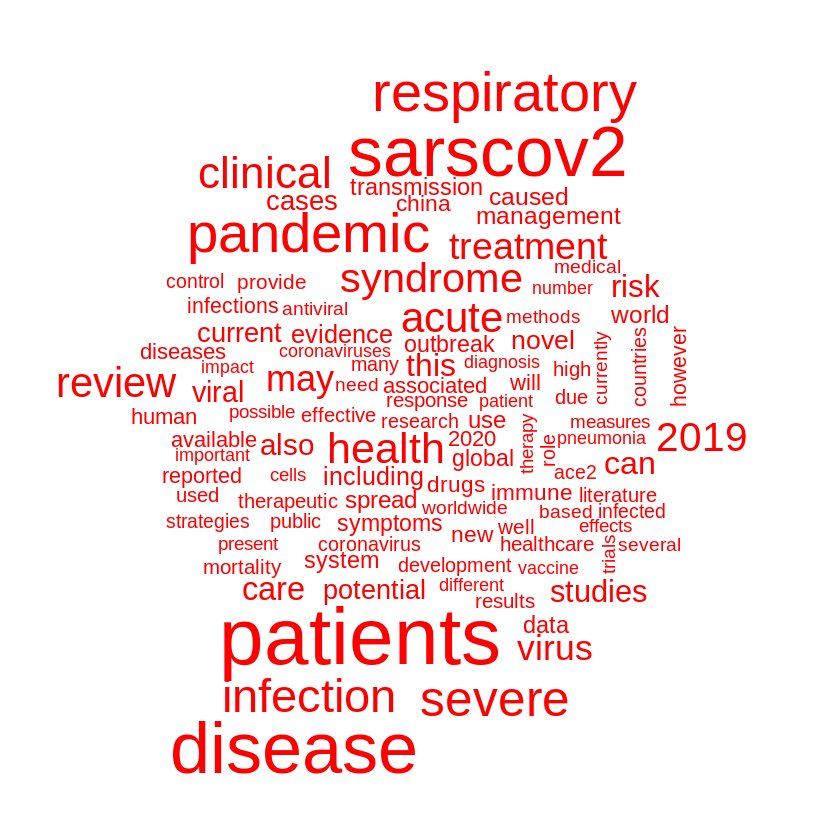

In [14]:
term <- names(term_frequency_covid)
num <- term_frequency_covid
word_freqs <- data.frame(term, num)
wordcloud(word_freqs$term, word_freqs$num, max.words = 100, colors = "red")

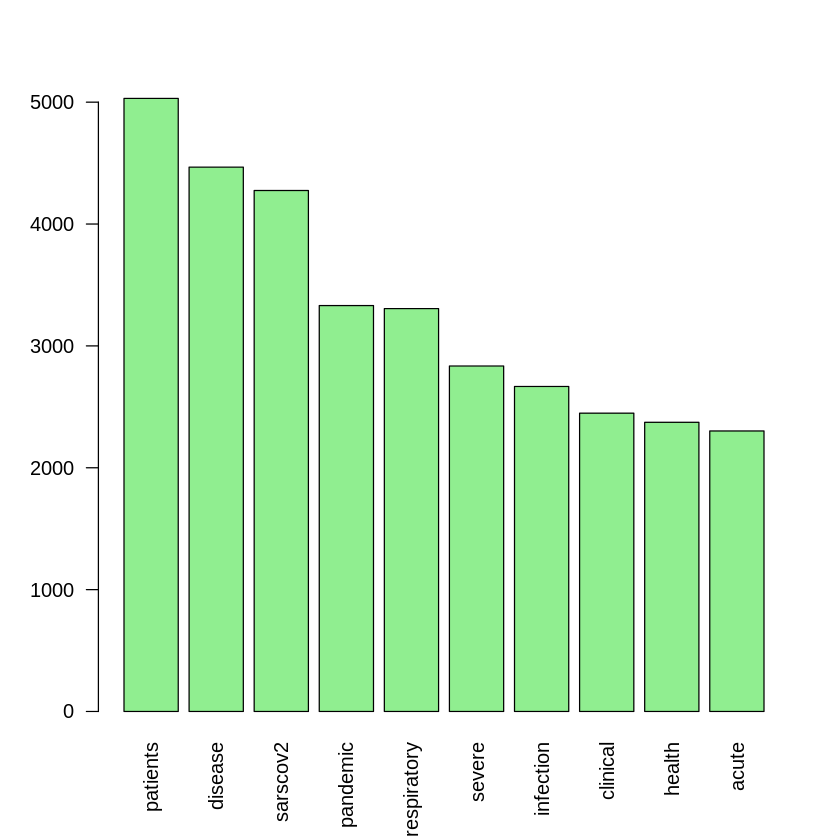

In [15]:
freq <- sort(colSums(as.matrix(covid_dtm)), decreasing=TRUE)   
barplot(freq[1:10],col="lightgreen",las=2)

<<DocumentTermMatrix (documents: 3767, terms: 34)>>
Non-/sparse entries: 43955/84123
Sparsity           : 66%
Maximal term length: 11
Weighting          : term frequency (tf)


Call:
hclust(d = d, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 34 


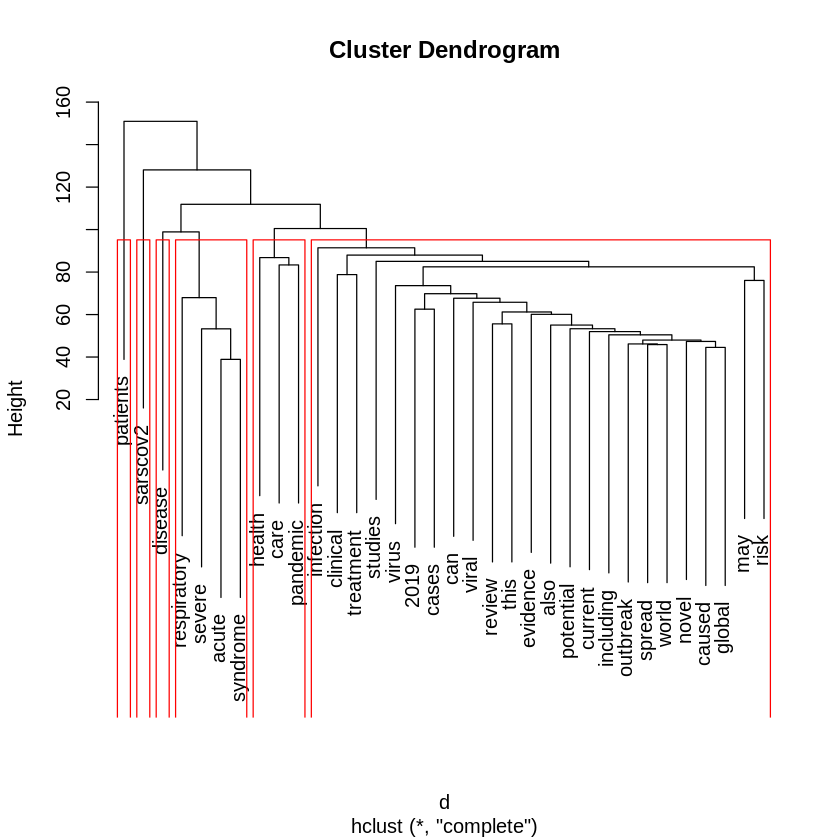

In [16]:
dtmss <- removeSparseTerms(covid_dtm, 0.80)   
dtmss   
d <- dist(t(dtmss), method="euclidian")   
fit <- hclust(d=d, method="complete")
fit 
plot(fit, hang=1) 
groups <- cutree(fit, k=6)   
rect.hclust(fit, k=6, border="red")

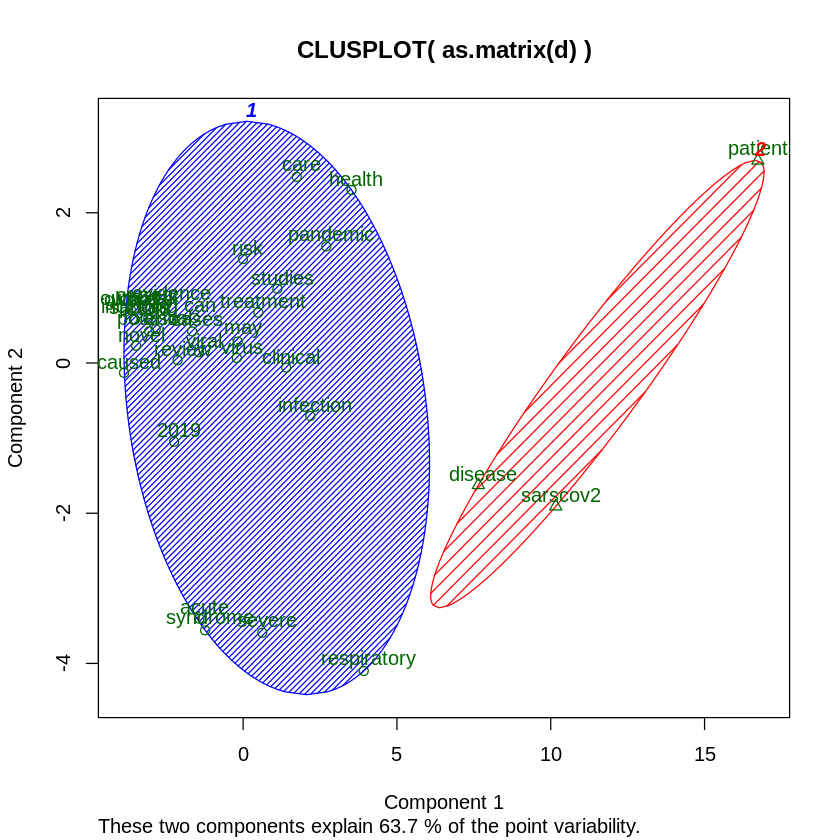

In [17]:
d <- dist(t(dtmss), method="euclidian")   
kfit <- kmeans(d, 2)   
clusplot(as.matrix(d), kfit$cluster, color=T, shade=T, labels=2, lines=0)

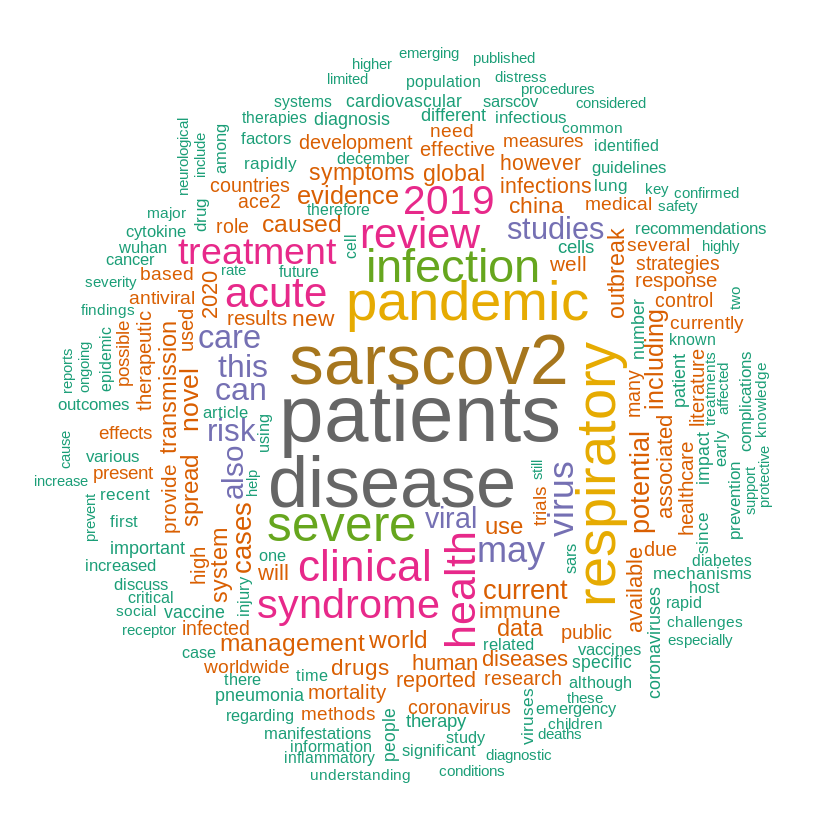

In [18]:
set.seed(1234)
wordcloud(words = word_freqs$term, freq = word_freqs$num, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

## Leitura dos dados Tweet Covid19

In [19]:
tweets_covid <-read_csv('covid19_tweets.csv')

Parsed with column specification:
cols(
  user_name = col_character(),
  user_location = col_character(),
  user_description = col_character(),
  user_created = col_datetime(format = ""),
  user_followers = col_double(),
  user_friends = col_double(),
  user_favourites = col_double(),
  user_verified = col_logical(),
  date = col_datetime(format = ""),
  text = col_character(),
  hashtags = col_character(),
  source = col_character(),
  is_retweet = col_logical()
)



In [20]:
glimpse(tweets_covid)

Rows: 179,108
Columns: 13
$ user_name        <chr> "ᏉᎥ☻լꂅϮ", "Tom Basile 🇺🇸", "Time4fisticuffs", "ethel…
$ user_location    <chr> "astroworld", "New York, NY", "Pewee Valley, KY", "S…
$ user_description <chr> "wednesday addams as a disney princess keepin it [̲̅…
$ user_created     <dttm> 2017-05-26 05:46:42, 2009-04-16 20:06:23, 2009-02-2…
$ user_followers   <dbl> 624, 2253, 9275, 197, 101009, 1180, 79956, 608, 25, …
$ user_friends     <dbl> 950, 1677, 9525, 987, 168, 1071, 54810, 355, 29, 342…
$ user_favourites  <dbl> 18775, 24, 7254, 1488, 101, 1287, 3801, 95, 18, 2980…
$ user_verified    <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…
$ date             <dttm> 2020-07-25 12:27:21, 2020-07-25 12:27:17, 2020-07-2…
$ text             <chr> "If I smelled the scent of hand sanitizers today on …
$ hashtags         <chr> NA, NA, "['COVID19']", "['COVID19']", "['CoronaVirus…
$ source           <chr> "Twitter for iPhone", "Twitter for Android", "Twitte…
$ is_retweet       <lgl> F

In [21]:
tweets_covid<-tweets_covid %>%select(c(user_location, date, text, source))

In [22]:
tweets_covid%>%head(5)

user_location,date,text,source
<chr>,<dttm>,<chr>,<chr>
astroworld,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",Twitter for iPhone
"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,Twitter for Android
"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,Twitter for Android
Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,Twitter for iPhone
Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 @kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,Twitter for Android


In [23]:
tweets_covid%>%tail(5)

user_location,date,text,source
<chr>,<dttm>,<chr>,<chr>
"Ilorin, Nigeria",2020-08-29 19:44:21,"Thanks @IamOhmai for nominating me for the @WHO #WearAMask challenge. I nominate @abdlbaasit_ @hvbxxb,… https://t.co/IegQDkKudT",Twitter for Android
Ontario,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 https://t.co/y48NP0yzgn,Twitter for Android
🇨🇦 Canada,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandc… https://t.co/wnXbbyoCe2,Twitter Web App
New York City,2020-08-29 19:44:14,"More than 1,200 students test positive for #COVID19 at major university - ABC News https://t.co/6aNhSiF5gh",Twitter for iPhone
"Aliwal North, South Africa",2020-08-29 19:44:08,I stop when I see a Stop @SABCNews @IzindabaNews24 @dailysunsa @eNCA @AliwalNorth @Ambitiouz_Ent @Official_SABC1… https://t.co/ReG8pwZoN7,Twitter for Android


In [24]:
tweets_covid<-head(tweets_covid, 5000)

In [44]:
dispositivos_utilizados<-tweets_covid %>%
             count(source)%>%
             arrange(-n)%>%
             head(10)
dispositivos_utilizados

source,n
<chr>,<int>
Twitter Web App,1365
Twitter for Android,1275
Twitter for iPhone,1014
TweetDeck,270
Hootsuite Inc.,157
Twitter for iPad,132
Buffer,53
Instagram,52
Sprout Social,40


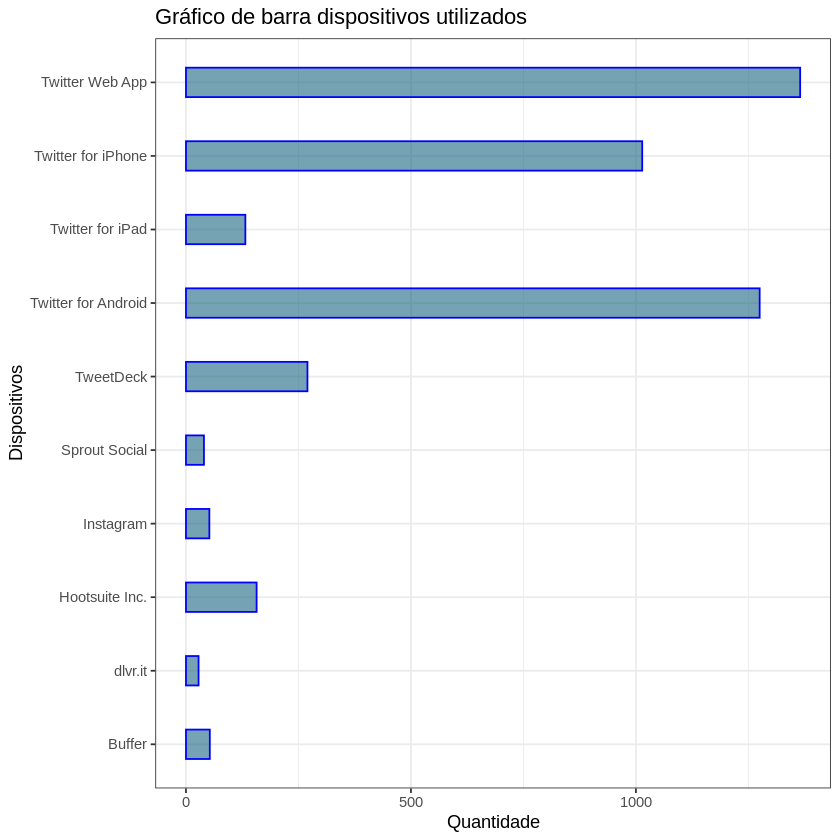

In [45]:
ggplot(dispositivos_utilizados, aes(x=source, y=n)) +
    geom_bar(stat="identity",color="blue",fill=rgb(0.1,0.4,0.5,0.7),alpha=.6, width=.4) +
    ggtitle("Gráfico de barra dispositivos utilizados") + 
    xlab("Dispositivos") +
    ylab("Quantidade") + 
    coord_flip() +
    theme_bw()

In [46]:
top_10_location<-tweets_covid %>%
             count(user_location)%>%
             arrange(-n)%>%
             head(5)
top_10_location

user_location,n
<chr>,<int>
NA,982
India,129
United States,76
United Kingdom,73
"London, England",65


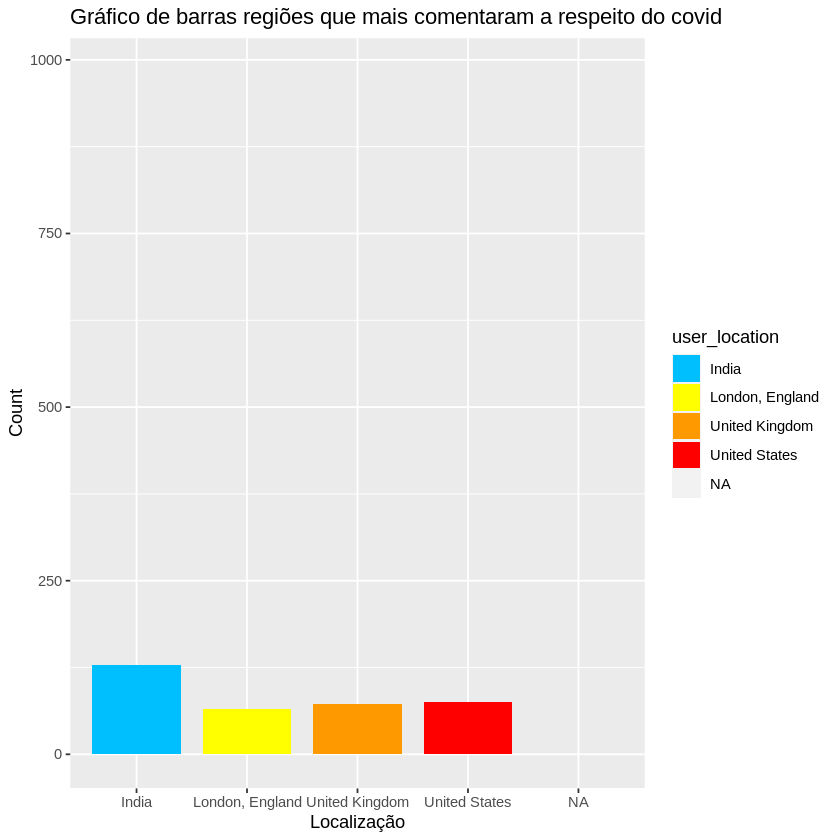

In [47]:
ggplot(top_10_location, aes(x = user_location,y = n, fill=user_location)) + 
    geom_bar(stat = "identity",width=0.8) + 
    ggtitle("Gráfico de barras regiões que mais comentaram a respeito do covid") + 
    xlab("Localização") +
    ylab("Count") + 
    scale_fill_manual(values = c(
        "#00bfff",
        "#ffff00",
        "#ff9900",
        "#ff0000",
        "#0000ff",
        "#000000",
        "#009900",
        "#cc3300",
        "#f2960d",
        "#ff0000"))

In [30]:
f.word.count <- function(my.list) { sum(stringr::str_count(my.list, "\\S+")) }
df <- data.frame(text.source = c("pub_med", "twitter"), line.count = NA, word.count = NA)
my.list <- list(pub_med = covid_df, twitter = tweets_covid)
df$line.count <- sapply(my.list, length)
df$word.count <- sapply(my.list, f.word.count)

Warning message in stri_count_regex(string, pattern, opts_regex = opts(pattern)):
“argument is not an atomic vector; coercing”
Warning message in stri_count_regex(string, pattern, opts_regex = opts(pattern)):
“argument is not an atomic vector; coercing”


In [48]:
head(df)

,text.source,line.count,word.count
,<fct>,<int>,<int>
1,pub_med,2,2648
2,twitter,4,114462


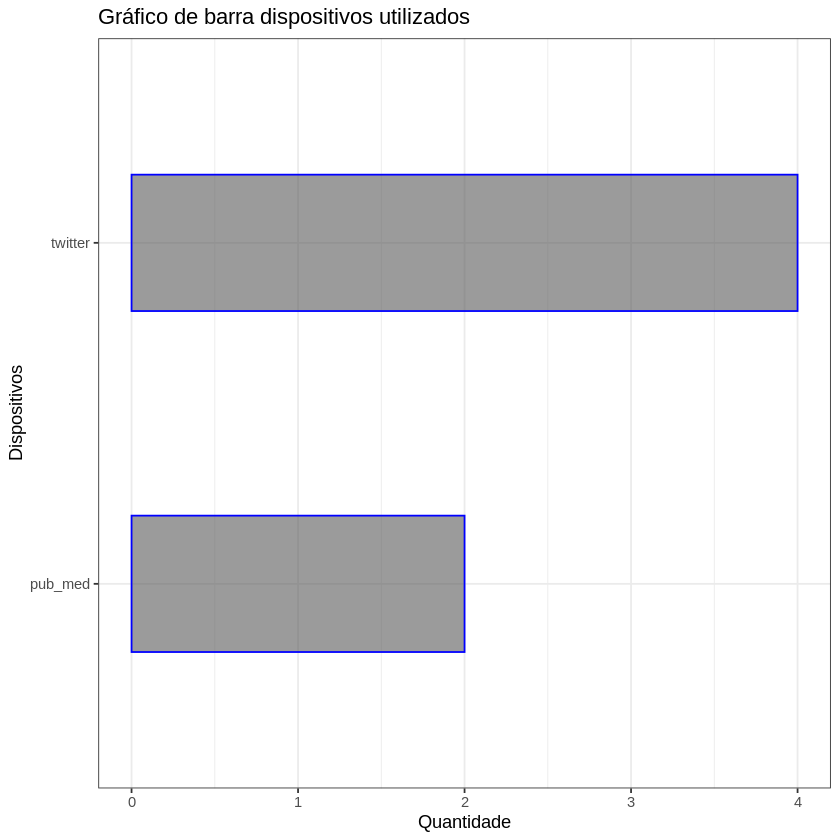

In [49]:
ggplot(df, aes(x=text.source, y=line.count)) +
    geom_bar(stat="identity",color="blue",alpha=.6, width=.4) +
    ggtitle("Gráfico de barra dispositivos utilizados") + 
    xlab("Dispositivos") +
    ylab("Quantidade") + 
    coord_flip() +
    theme_bw()

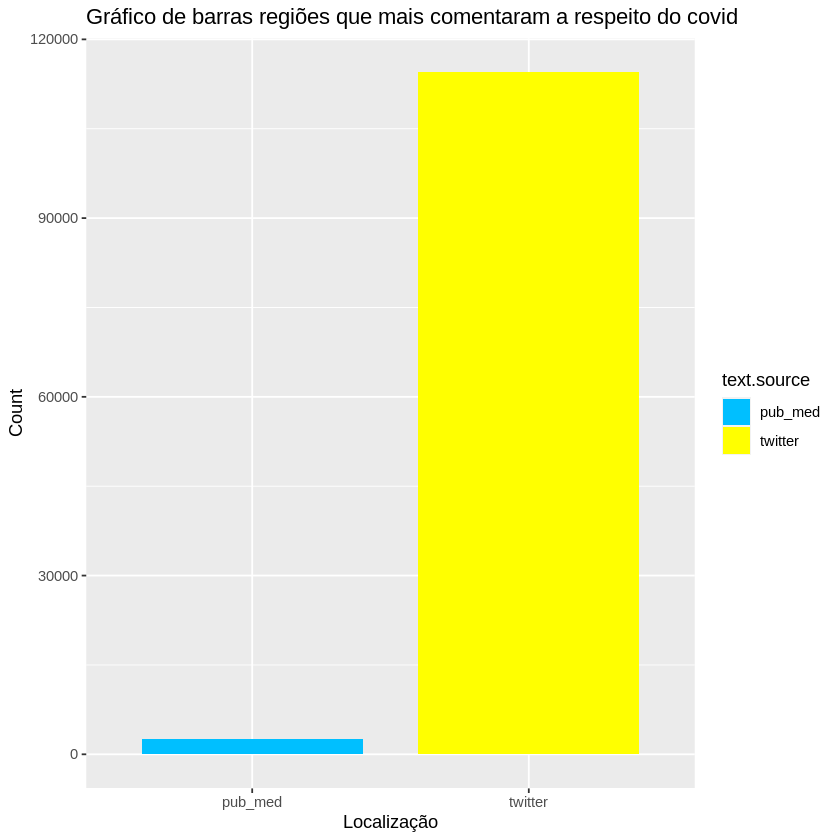

In [50]:
ggplot(df, aes(x = text.source,y = word.count, fill=text.source)) + 
    geom_bar(stat = "identity",width=0.8) + 
    ggtitle("Gráfico de barras regiões que mais comentaram a respeito do covid") + 
    xlab("Localização") +
    ylab("Count") + 
    scale_fill_manual(values = c(
        "#00bfff",
        "#ffff00"
    ))

In [55]:
# definindo a fonte texto tweets
tweets_covid_source <- VectorSource(tweets_covid$text)
# transformando em corpus texto tweets
tweets_covid_corpus <- VCorpus(tweets_covid_source)

In [56]:
print(tweets_covid_corpus)
tweets_covid_corpus[[1]]
tweets_covid_corpus[[1]]$content

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5000


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 140

[1] "If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0"

## Aplicando a limpeza e normalização dos dados Tweets Covid19

In [57]:
remover_https_url <-function(texto)gsub("https.*","",  texto)
remover_http_url <-function(texto)gsub("http.*","",  texto)
remover_barra <-function(texto)gsub("/", "", texto)
remover_barras <-function(texto)gsub("\\|", "", texto)
remover_arroba <-function(texto)gsub("@", "", texto)
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_https_url))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_http_url))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_barra))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_barras))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(remover_arroba))                                                        
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(removePunctuation))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(removeNumbers))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, removeWords, words = c(new_stops))
tweets_covid_corpus <-tm_map(tweets_covid_corpus, content_transformer(stripWhitespace))
tweets_covid_corpus[[1]]$content

[1] "If I smelled scent hand sanitizers today someone past I think intoxicated … "

In [58]:
tweet_covid_dtm <- DocumentTermMatrix(tweets_covid_corpus)
tweet_covid_dtm

<<DocumentTermMatrix (documents: 5000, terms: 14066)>>
Non-/sparse entries: 47794/70282206
Sparsity           : 100%
Maximal term length: 58
Weighting          : term frequency (tf)

In [59]:
tweet_covid_tdm <- TermDocumentMatrix(tweets_covid_corpus)
tweet_covid_tdm

<<TermDocumentMatrix (terms: 14066, documents: 5000)>>
Non-/sparse entries: 47794/70282206
Sparsity           : 100%
Maximal term length: 58
Weighting          : term frequency (tf)

In [60]:
tweet_covid_m1 <- as.matrix(tweet_covid_dtm)

In [61]:
tweet_covid_m2 <- as.matrix(tweet_covid_tdm)

In [62]:
tweet_covid_m1[1:10, 1000:1010]

,argue,argues,argument,argumentum,argus,arikthebuilder,arise,arizona,arizona…,arizona’s,arleneainsley
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0


In [63]:
tweet_covid_m2[1000:1010, 1:10]

,1,2,3,4,5,6,7,8,9,10
argue,0,0,0,0,0,0,0,0,0,0
argues,0,0,0,0,0,0,0,0,0,0
argument,0,0,0,0,0,0,0,0,0,0
argumentum,0,0,0,0,0,0,0,0,0,0
argus,0,0,0,0,0,0,0,0,0,0
arikthebuilder,0,0,0,0,0,0,0,0,0,0
arise,0,0,0,0,0,0,0,0,0,0
arizona,0,0,0,0,0,0,0,0,0,0
arizona…,0,0,0,0,0,0,0,0,0,0
arizona’s,0,0,0,0,0,0,0,0,0,0


In [64]:
freq.terms <- findFreqTerms(tweet_covid_tdm, lowfreq = 20)
freq.terms[1:100]

[1] "’re"                 "across"              "active"             
  [4] "affected"            "africa"              "air"                
  [7] "alert"               "all"                 "already"            
 [10] "alreadyvideo"        "also"                "america"            
 [13] "americans"           "amid"                "amp"                
 [16] "and"                 "announced"           "another"            
 [19] "anyone"              "app"                 "are"                
 [22] "around"              "available"           "away"               
 [25] "back"                "best"                "better"             
 [28] "big"                 "bjp"                 "blood"              
 [31] "borisjohnson"        "breaking"            "business"           
 [34] "businesses"          "but"                 "call"               
 [37] "can"                 "cant"                "care"               
 [40] "case"                "cases"               "center"             
 [43] "challenging"         "check"               "chief"              
 [46] "children"            "china"               "cnn"                
 [49] "come"                "community"           "confirmed"          
 [52] "contact"             "control"             "corona"             
 [55] "coronainfoch"        "coronavirus"         "coronaviruspandemic"
 [58] "coronavirusupdate"   "countries"           "country"            
 [61] "covid"               "covid…"              "crisis"             
 [64] "daily"               "data"                "day"                
 [67] "days"                "dead"                "death"              
 [70] "deaths"              "despite"             "died"               
 [73] "distancing"          "don’t"               "done"               
 [76] "dont"                "due"                 "early"              
 [79] "economic"            "education"           "england"            
 [82] "enough"              "especially"          "even"               
 [85] "ever"                "every"               "everyone"           
 [88] "evidence"            "expert"              "experts"            
 [91] "face"                "facemask"            "families"           
 [94] "family"              "far"                 "father"             
 [97] "feel"                "fight"               "find"               
[100] "first"

In [73]:
term_frequency_tweet_covid <- rowSums(tweet_covid_m2)
term_frequency_tweet_covid <- sort(term_frequency_tweet_covid, decreasing = TRUE)
df<-head(term_frequency_tweet_covid, 100)
df<-data.frame(df)
head(df, 10)

,df
,<dbl>
covid,627
cases,525
new,396
amp,296
people,250
will,247
can,194
pandemic,191
health,185


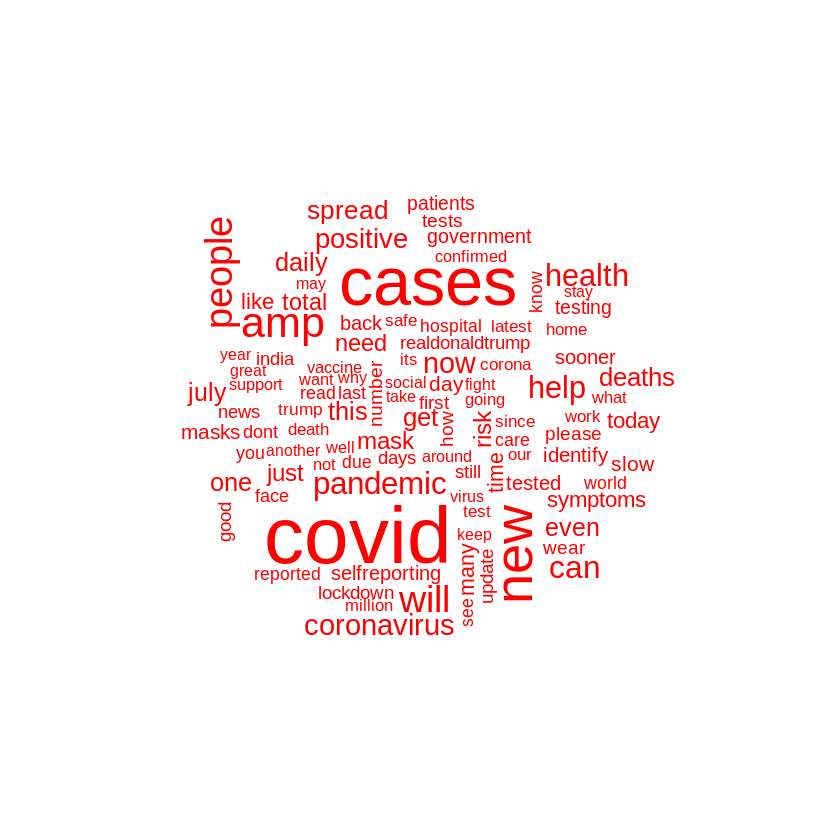

In [74]:
term <- names(term_frequency_tweet_covid)
num <- term_frequency_tweet_covid
word_freqs <- data.frame(term, num)
wordcloud(word_freqs$term, word_freqs$num, max.words = 100, colors = "red")

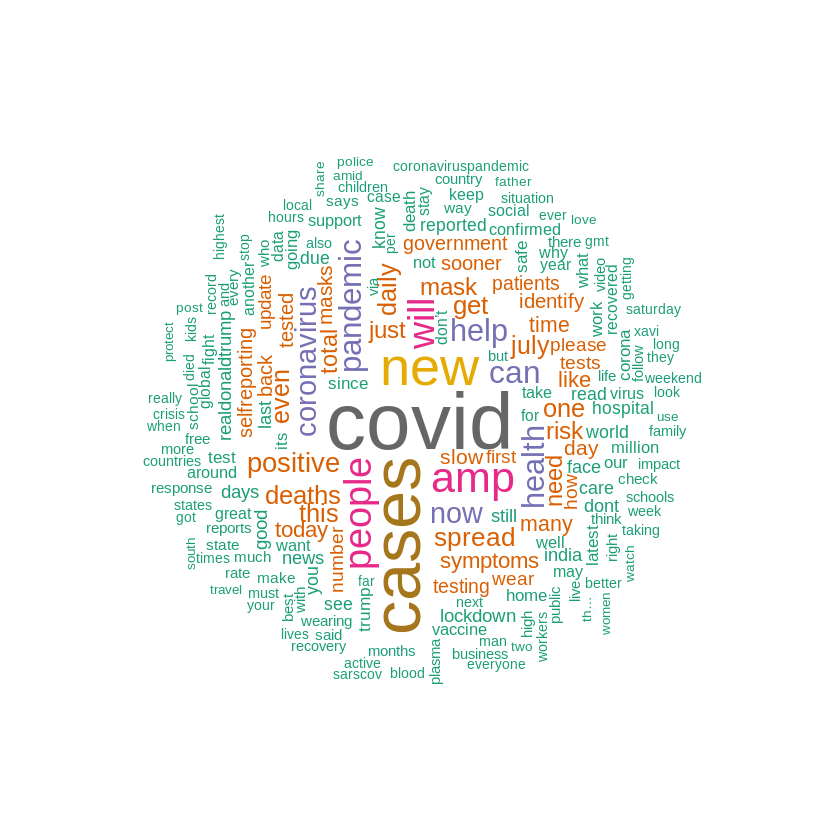

In [75]:
set.seed(1234)
wordcloud(words = word_freqs$term, freq = word_freqs$num, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

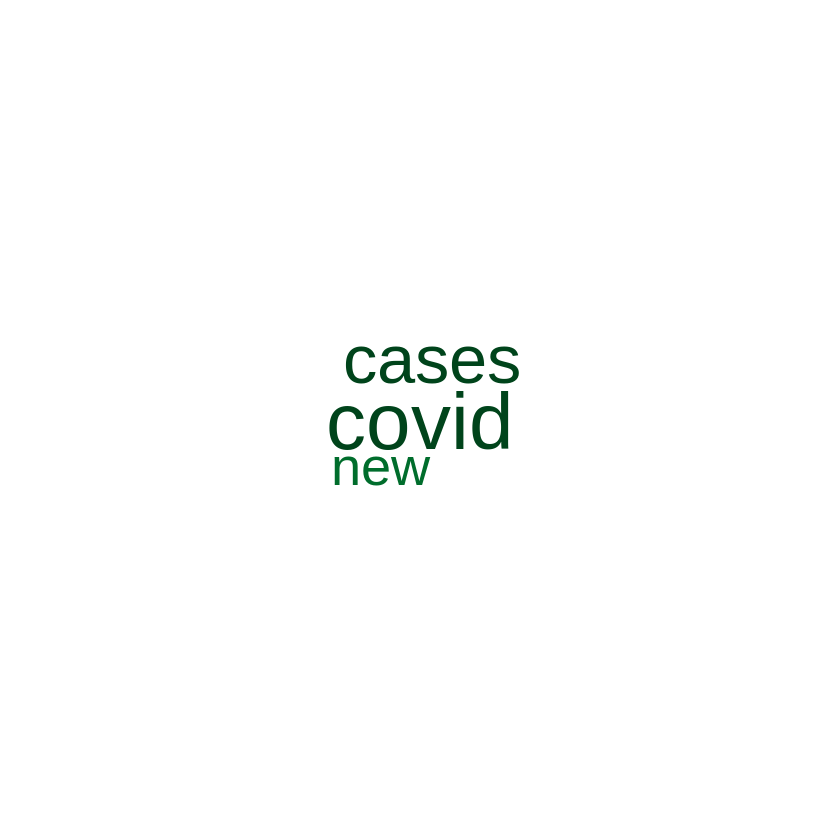

In [76]:
word.freq <- sort(rowSums(tweet_covid_m2), decreasing = T)
pal <- brewer.pal(9, "BuGn")[-(1:4)]
wordcloud(words = names(word.freq), freq = word.freq, min.freq = 300,
    random.order = F, colors = pal)

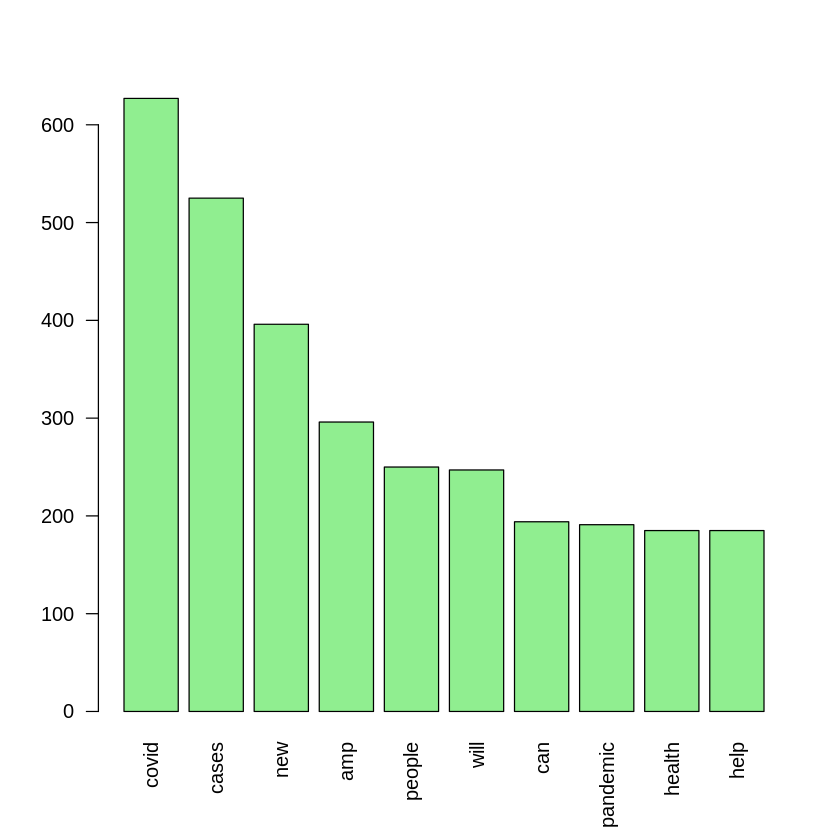

In [77]:
freq <- sort(colSums(tweet_covid_m1), decreasing=TRUE)   
barplot(freq[1:10],col="lightgreen",las=2)

In [ ]:
trigram.twitterTdm <- tm::TermDocumentMatrix(text.corpus["twitter"], control = list(tokenize = TrigramTokenizer))
freq.trigram.twitter <- data.frame(word = trigram.twitterTdm$dimnames$Terms, frequency = trigram.twitterTdm$v)
freq.trigram.twitter <- plyr::arrange(freq.trigram.twitter, -frequency)